# Assignment 10: More on Choropleth, Folium Map, and Raster Data

In [1]:
!pip install mapclassify #helper package
!pip install osmnx
!pip install rioxarray

import geopandas as gpd # import geopandas
import osmnx as ox # import osmnx
import folium as fm # import folium
import rioxarray as rxr #import rioxarray

# packages you already familiar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import shapely.geometry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 46.5 MB/s eta 0:00:00


*NOTE: YOU MAY ENCOUNTER WARNING MESSGAE WHEN RUNNING THE GIVEN CODE AND SOLUTION, PLEASE INGORE IT*

## Q1. Health Network Fairness in Choropleth

### Q1a

**Your Text Answer**

1.   Key: amenity. Values: Hospital, Clinic, Doctors, Pharmacy, Dentist
2.   Key: emergency. Values: ambulance_station, defibrillator
3.   Key: healthcare. Values: alternative, counselling, blood_donation



### Q1b

In [2]:
### DO NOT MODIFY ###
warnings.filterwarnings('ignore')
place = 'toronto, ontario, canada'
tag = {'amenity': ['hospital', 'clinic']}
toronto_hospital = gpd.read_file('https://raw.githubusercontent.com/MIE223-2024/course-datasets/refs/heads/main/toronto_hospital.geojson')
toronto_hospital.head()

,name,property_type,geometry
0,Scarborough Health Network - Centenary Hospital,hospital,POINT (-79.20481 43.78025)
1,Centre For Addiction and Mental Health - Queen...,hospital,POINT (-79.41864 43.643)
2,Sunnybrook Health Sciences Centre - Bayview Ca...,hospital,POINT (-79.37479 43.7227)
3,Toronto Western Hospital,hospital,POINT (-79.40548 43.65351)
4,St. Joseph's Health Centre,hospital,POINT (-79.45006 43.6403)


In [3]:
### DO NOT MODIFY ###
warnings.filterwarnings('ignore')
!wget https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/files-fichiers/2016/lfsa000a16a_e.zip
!unzip lfsa000a16a_e.zip -d lfsa000a16a_e

toronto_FSA = gpd.read_file('lfsa000a16a_e')
# 'CFSAUID' start with m
toronto_FSA = toronto_FSA[toronto_FSA['CFSAUID'].str.startswith('M')]
toronto_FSA = toronto_FSA[['CFSAUID', 'geometry']]
toronto_FSA['property_type'] = 'FSA'
toronto_FSA.columns = ['name', 'geometry', 'property_type']
toronto_FSA.head()

--2025-03-30 21:36:35--  https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/files-fichiers/2016/lfsa000a16a_e.zip
Resolving www12.statcan.gc.ca (www12.statcan.gc.ca)... 167.44.105.15
Connecting to www12.statcan.gc.ca (www12.statcan.gc.ca)|167.44.105.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15662579 (15M) [application/x-zip-compressed]
Saving to: ‘lfsa000a16a_e.zip’

lfsa000a16a_e.zip   100%[===================>]  14.94M  2.88MB/s    in 5.7s    

2025-03-30 21:36:41 (2.62 MB/s) - ‘lfsa000a16a_e.zip’ saved [15662579/15662579]

Archive:  lfsa000a16a_e.zip
  inflating: lfsa000a16a_e/lfsa000a16a_e.dbf  
  inflating: lfsa000a16a_e/lfsa000a16a_e.prj  
  inflating: lfsa000a16a_e/lfsa000a16a_e.shp  
  inflating: lfsa000a16a_e/lfsa000a16a_e.shx  
  inflating: lfsa000a16a_e/forward_sortation_area.html  
  inflating: lfsa000a16a_e/92-179-g2016001-eng.pdf  


,name,geometry,property_type
637,M9R,"POLYGON ((7209908.14 928259.897, 7209816.766 9...",FSA
638,M9V,"POLYGON ((7206682.694 937743.451, 7206631.563 ...",FSA
639,M9W,"POLYGON ((7210531.76 934710.503, 7210542.117 9...",FSA
701,M1P,"POLYGON ((7233594.731 942118.174, 7233584.157 ...",FSA
702,M1R,"MULTIPOLYGON (((7231166.76 939882.914, 7231356...",FSA


In [4]:
### Your code here ###
print("CRS of toronto_hospital:", toronto_hospital.crs)
print("CRS of toronto_FSA:", toronto_FSA.crs)

### Your code here ###
print("CRS of toronto_hospital:", toronto_hospital.crs)
print("CRS of toronto_FSA:", toronto_FSA.crs)

#change CRS to ESPG:4326 if their CRS is not the same
if toronto_hospital.crs != 'espg:4326':
  toronto_hospital = toronto_hospital.to_crs('epsg:4326')
if toronto_FSA.crs != 'espg:4326':
  toronto_FSA = toronto_FSA.to_crs('epsg:4326')

#concatenate the geodataframes and display
gdf_all = pd.concat([toronto_hospital, toronto_FSA], axis=0, ignore_index=True)
gdf_all.head()

#concatenate the geodataframes and display
gdf_all = pd.concat([toronto_hospital, toronto_FSA], axis=0, ignore_index=True)
gdf_all.head()

CRS of toronto_hospital: EPSG:4326
CRS of toronto_FSA: PROJCS["PCS_Lambert_Conformal_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",63.390675],PARAMETER["central_meridian",-91.8666666666667],PARAMETER["standard_parallel_1",49],PARAMETER["standard_parallel_2",77],PARAMETER["false_easting",6200000],PARAMETER["false_northing",3000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
CRS of toronto_hospital: EPSG:4326
CRS of toronto_FSA: PROJCS["PCS_Lambert_Conformal_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["la

,name,property_type,geometry
0,Scarborough Health Network - Centenary Hospital,hospital,POINT (-79.20481 43.78025)
1,Centre For Addiction and Mental Health - Queen...,hospital,POINT (-79.41864 43.643)
2,Sunnybrook Health Sciences Centre - Bayview Ca...,hospital,POINT (-79.37479 43.7227)
3,Toronto Western Hospital,hospital,POINT (-79.40548 43.65351)
4,St. Joseph's Health Centre,hospital,POINT (-79.45006 43.6403)


### Q1c

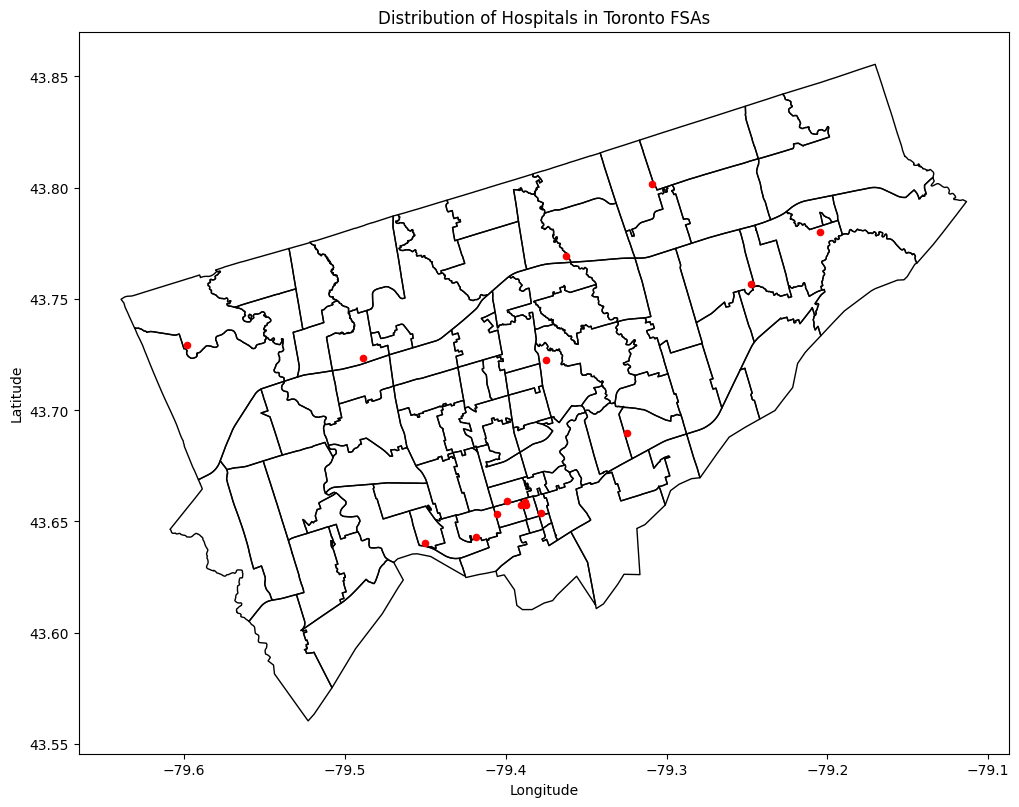

In [5]:
### Your code here ###
# You do not need to color your shapes in this part of the question
#display the choropleth
fig, ax = plt.subplots(figsize=(12, 12))  # Adjust figure size as needed

# Plot FSAs with no fill color
gdf_all[gdf_all['property_type'] == 'FSA'].plot(ax=ax,
                                                edgecolor='black',
                                                facecolor='none')

# Plot hospitals as red dots on top
gdf_all[gdf_all['property_type'] != 'FSA'].plot(ax=ax,
                                                markersize=20,
                                                color='red',
                                                marker='o')

# Set title and labels
ax.set_title('Distribution of Hospitals in Toronto FSAs')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

**Your Text Answer**
There is a visual imbalance in the distribution of hosptials where central Toronto seems to have more hospitals that the outer areas of Toronto

### Q1d

In [6]:
# calculate the centroid of each row in gdf_all if it is a polygon or MultiPolygon
## Your code here ###
gdf_all['centroid'] = gdf_all['geometry'].apply(lambda g: g.centroid if isinstance(g, shapely.geometry.Polygon) or isinstance(g, shapely.geometry.MultiPolygon) else g)
fsa_centroids = gdf_all[gdf_all['property_type'] == 'FSA']['centroid'].values
hospital_geo = gdf_all[gdf_all['property_type'] != 'FSA']['geometry'].values
##your code end here ###

In [7]:
# calculate the distance matrix between each FSA centriod and hospital
## Your code here ###
num_fsas = len(fsa_centroids)
num_hospitals = len(hospital_geo)
distance_matrix = np.zeros((num_fsas, num_hospitals))

#calculate the distance
for i in range(num_fsas):
  for j in range(num_hospitals):
    distance_matrix[i, j] = fsa_centroids[i].distance(hospital_geo[j])
#create dataframe with labels
hospital_names = gdf_all[gdf_all['property_type'] != 'FSA']['name'].values
fsa_codes = gdf_all[gdf_all['property_type'] == 'FSA']['name'].values
distance_matrix_df = pd.DataFrame(distance_matrix, index=fsa_codes, columns=hospital_names)

# Display first five rows
distance_matrix_df.head()

,Scarborough Health Network - Centenary Hospital,Centre For Addiction and Mental Health - Queen Street Site,Sunnybrook Health Sciences Centre - Bayview Campus,Toronto Western Hospital,St. Joseph's Health Centre,Michael Garron Hospital,Etobicoke General Hospital,Humber River Hospital,Scarborough Health Network - General Campus,Scarborough Health Network - Birchmount Hospital,North York General Hospital,Toronto General Hospital,Hospital for Sick Children,Mount Sinai Hospital,Centre For Addiction and Mental Health - College Street Site,St. Michael's Hospital
M9R,0.365086,0.146369,0.186494,0.156309,0.117911,0.233066,0.057618,0.078006,0.317728,0.273428,0.211529,0.172316,0.173130,0.170388,0.161292,0.183388
M9V,0.391324,0.202029,0.220449,0.208868,0.176941,0.274522,0.013983,0.107479,0.346817,0.290978,0.233110,0.222667,0.223731,0.221119,0.212260,0.234141
M9W,0.385836,0.178507,0.209764,0.187347,0.151057,0.259992,0.023838,0.096522,0.339601,0.289709,0.229242,0.202582,0.203500,0.200794,0.191738,0.213871
M1P,0.067660,0.190490,0.111969,0.173655,0.217406,0.090713,0.329641,0.222007,0.022906,0.055718,0.092980,0.157066,0.157537,0.159487,0.165377,0.152953
M1R,0.097361,0.161511,0.082105,0.144695,0.187853,0.065660,0.301504,0.193196,0.049884,0.053526,0.068432,0.128541,0.129104,0.130923,0.136407,0.125230


### Q1e

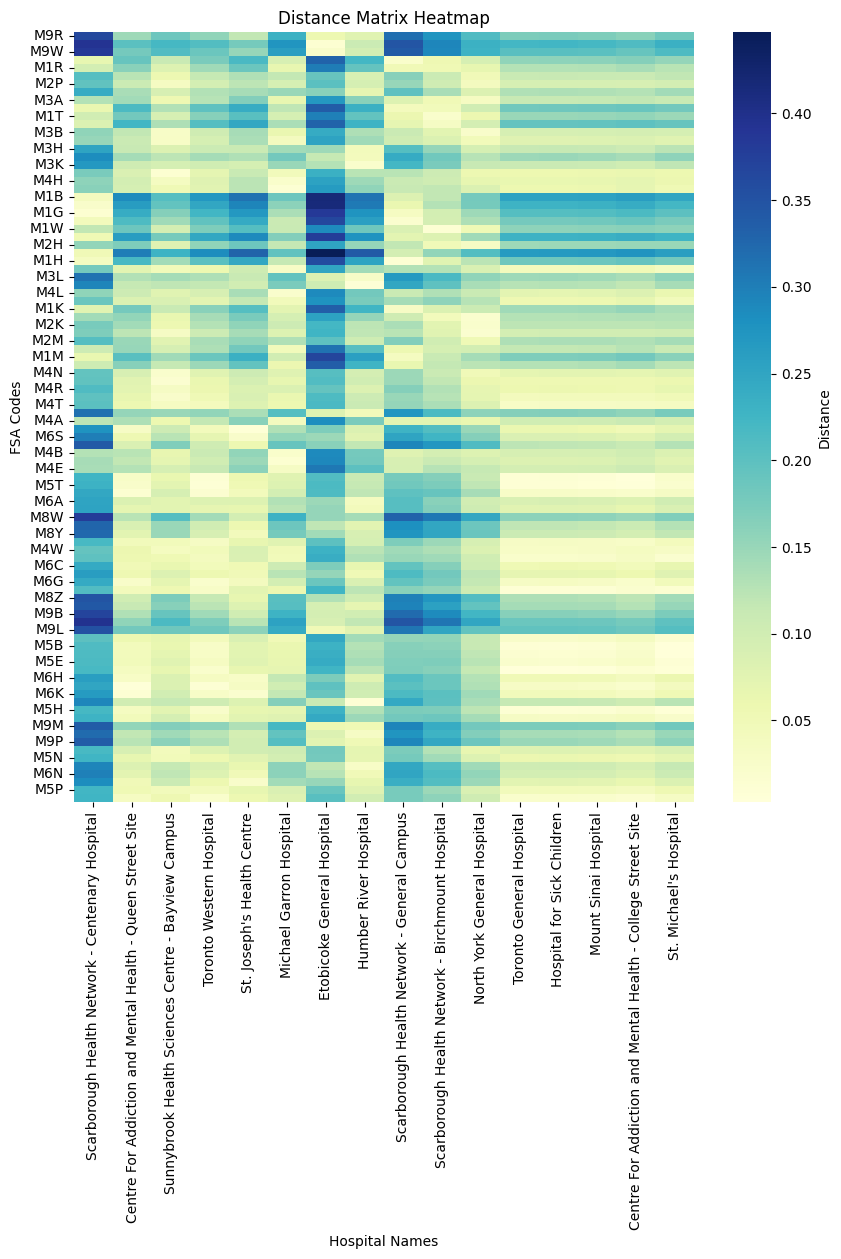

In [8]:
warnings.filterwarnings('ignore')
import seaborn as sns
### you code here##
#plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(distance_matrix_df, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Distance'})
plt.title('Distance Matrix Heatmap')
plt.xlabel('Hospital Names')
plt.ylabel('FSA Codes')
plt.show()

**Your Text Answer**
Based on the color patterns in the heatmap, there is am imbalance in the the distances to the hospitals. FSAs closer to the center have shorter distance to hospitals.

## Q2: Visualizing Health Network Fairness


### Q2a

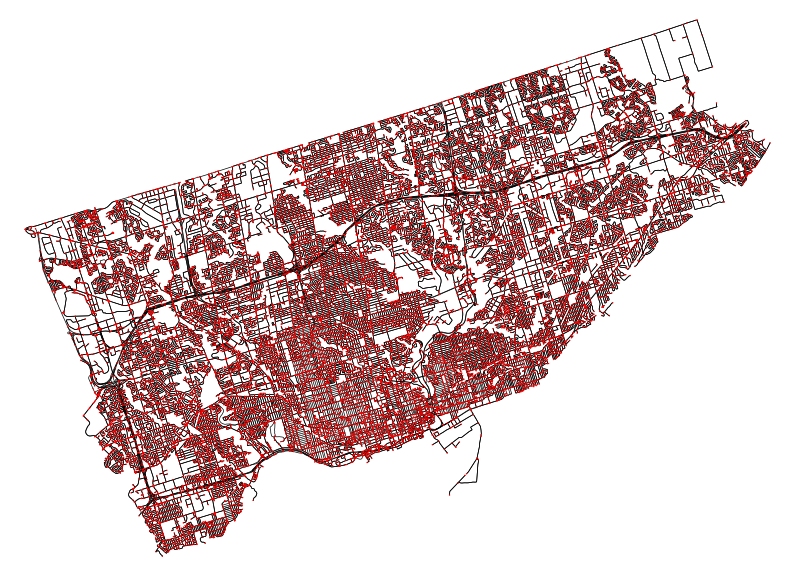

Number of nodes: 27390
Number of edges: 73051


In [9]:
## you code here ##
#retrieve the drivable street map
place_name = "City of Toronto, Ontario, Canada"
graph = ox.graph_from_place(place_name, network_type='drive')
#plot the graph
fig, ax = plt.subplots(figsize=(10,10))
ox.plot_graph(graph,
              bgcolor='white',
              node_color='red',
              node_size=1,
              edge_linewidth=0.5,
              edge_color='black',
              show=False,
              close=False,
              ax=ax)
plt.show()

num_nodes = graph.number_of_nodes()
num_edges = graph.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
# the solution might take > 1 min to run

**your text answer**
There are 27390 nodes and 73051 edges

### Q2b

In [10]:
### DO NOT MODIFY ###
warnings.filterwarnings('ignore')
distance_matrix_by_shortest_path = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/distance_matrix_by_shortest_path.csv', index_col=0)
# create a new pandas series to store the nearest distance
smallest_distance_by_shortest_path = distance_matrix_by_shortest_path.min(axis=1)
# assign the name of the series for future merging
smallest_distance_by_shortest_path.name = 'nearest_hospital'

# obtain all row that is a foward sortation area
toronto_FSA.to_crs(epsg=4326, inplace=True)
toronto_FSA['centroid'] = toronto_FSA['geometry'].apply(lambda x: x.centroid)
# merge the distance series with the FSA shape data
gdf_smallest_distance_by_shortest_path = toronto_FSA.merge(smallest_distance_by_shortest_path, left_on='name', right_index=True).rename(columns={0: 'nearest_hospital'})
gdf_smallest_distance_by_shortest_path.head()
# Since the given code reuse some code in previous questions, which can be accidentally manipulated in some cases.
# To make sure the given code generates the correct value for your assignment, we want you to run the given code and validate the output matches with our original output.
# your output should be exactly the same as the expected output, if not, re-run given code in Q1

,name,geometry,property_type,centroid,nearest_hospital
637,M9R,"POLYGON ((-79.56131 43.67478, -79.56249 43.674...",FSA,POINT (-79.55799 43.68778),6973.215
638,M9V,"POLYGON ((-79.57759 43.76205, -79.57829 43.761...",FSA,POINT (-79.59433 43.74274),1854.019
639,M9W,"POLYGON ((-79.53885 43.72937, -79.53884 43.728...",FSA,POINT (-79.58416 43.70983),2981.682
701,M1P,"POLYGON ((-79.24704 43.75374, -79.2472 43.7536...",FSA,POINT (-79.27 43.76213),2710.604
702,M1R,"MULTIPOLYGON (((-79.28125 43.73867, -79.27985 ...",FSA,POINT (-79.29717 43.74945),4471.884


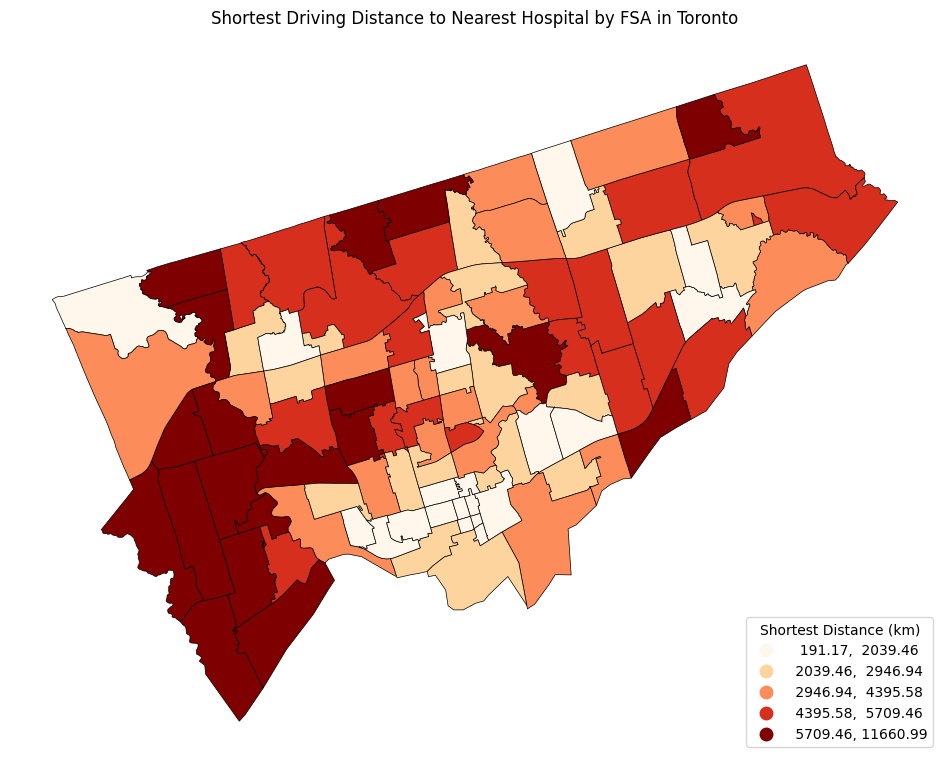

In [11]:
## you code here ##
fig, ax = plt.subplots(figsize=(12,10))
gdf_smallest_distance_by_shortest_path.plot(column='nearest_hospital',
                                            cmap='OrRd',
                                            scheme='Quantiles',
                                            k=5,
                                            legend=True,
                                            legend_kwds={'loc': 'lower right', 'title': 'Shortest Distance (km)'},
                                            edgecolor='black',
                                            linewidth=0.5,
                                            ax=ax)
ax.set_title('Shortest Driving Distance to Nearest Hospital by FSA in Toronto')
ax.set_axis_off()
plt.show()

**your text answer** The outskirts of the city are shaded in a deeper red than the center of the city, indicating that they have poorer access to hospitals.

### Q2c

In [12]:
## DO NOT MODIFY ##
warnings.filterwarnings('ignore')
census_data = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/2016_census.csv').iloc[:, 1:]
census_data.columns = ['name', 'median_income', 'population','visual_minority']
census_data['prec_visual_minority'] = census_data['visual_minority'] / census_data['population']
census_data = toronto_FSA.merge(census_data, on='name')
census_data = census_data[['name','prec_visual_minority','centroid']]
census_data.head()

# your output should be exactly the same as the expected output, if not, re-run given code in Q1

,name,prec_visual_minority,centroid
0,M9R,0.544557,POINT (-79.55799 43.68778)
1,M9V,0.814882,POINT (-79.59433 43.74274)
2,M9W,0.689214,POINT (-79.58416 43.70983)
3,M1P,0.737640,POINT (-79.27 43.76213)
4,M1R,0.564003,POINT (-79.29717 43.74945)


In [13]:
# empty folium map
nearest_hospital_map = fm.Map(location=[43.7, -79.4], zoom_start=12,
                                  scrollWheelZoom=False, tiles=None,
                                    control_scale=True)
# geo-json file with vector shape of FSA
FSA_json = gdf_smallest_distance_by_shortest_path[['name', 'geometry']].to_json()

## you code here ##
quantile = census_data['prec_visual_minority'].quantile([0, 0.25,0.5, 0.75, 1]).to_list()
#Tile Layer
fm.TileLayer('openstreetmap').add_to(nearest_hospital_map)
#Chloropleth Layer
fm.Choropleth(geo_data=FSA_json,
              data=census_data,
              name='Distance to Nearest Hospital',
              key_on='feature.properties.name',
              columns=['name', 'prec_visual_minority'],
              fill_color = 'OrRd',
              fill_opacity=0.4,
              line_opacity=0.2,
              bins = quantile,
              legend_name = 'Distance to Nearest Hospital'
).add_to(nearest_hospital_map)
#Circle Marker Layer
prec_visual_minority = fm.FeatureGroup(name='Prec. Visual Minority', control=True).add_to(nearest_hospital_map)
for idx, row in census_data.iterrows():
  centroid = [row['centroid'].y, row['centroid'].x]
  fm.CircleMarker(centroid, radius=row['prec_visual_minority']*20, color='blue',
                  fill=True, fill_color='blue').add_to(prec_visual_minority)
#Layer Control
fm.TileLayer('cartodb dark_matter',show=False).add_to(nearest_hospital_map)
fm.TileLayer('cartodb positron',show=False).add_to(nearest_hospital_map)
fm.LayerControl().add_to(nearest_hospital_map)
nearest_hospital_map

### Q2d
**your text answer**
The larger circles represent a high percentage of visual minors. The areas with larger circles also tend to have darker colors, indicating that a higher percentage of visual minors leads to a longer distance to the nearest hospital.

## Q3: Raster Data (OPTIONAL: THIS QUESTION DOES NOT COUNT TOWARDS THE TOTAL GRADE)

In [14]:
## DO NOT MODIFY ##
warnings.filterwarnings('ignore')
url = 'https://www.arcgis.com/sharing/rest/content/items/4b1863b58f9a4aa98f3eb4e95299cff2/data'
raster_data = rxr.open_rasterio(url,masked=True).squeeze() # open the raster data

### Q3a

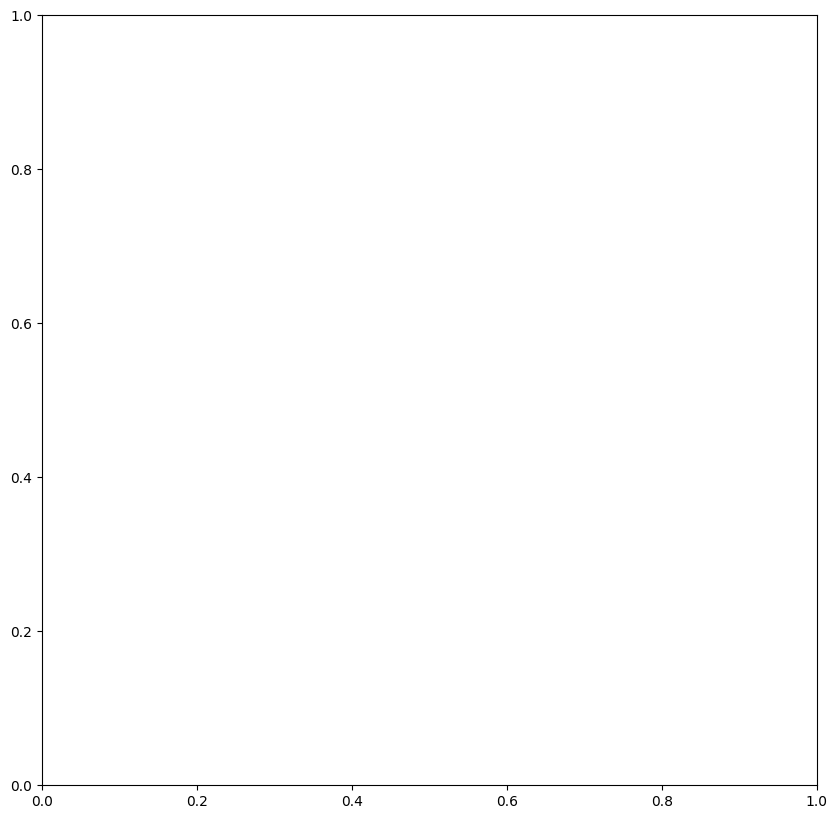

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
## your code here ##
# plot the raster_data
# you might encounter following error when plotting  'ERROR 1: Line 22: </table> doesn't have matching <table>'
# please let the code run, it will generate the plot.

In [16]:
# what is the shape, the CRS?


**your text answer**

### Q3b

In [17]:
import xarray as xr
## your code here ##


**you text answer**

### Q3c
**you text answer**